## Importing some modules for handeling data and some plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Some Modules to modify text

In [2]:
import re
import string

## Importing ML libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Some modules to check accuracy and scores of the models

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, precision_score, recall_score

### Importing data

In [5]:
fake = pd.read_csv("../input/fake-news-detection/Fake.csv")
true = pd.read_csv("../input/fake-news-detection/True.csv")
print('Fake news data: ',fake.shape)
print('True news data:',true.shape)

Fake news data:  (23481, 4)
True news data: (21417, 4)


### Previewing Data

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Creating a new column for marking fake and true news

In [8]:
fake['class'] = 0
true['class'] = 1

### Combining two data to one data

In [9]:
data = pd.concat([fake, true], axis=0)

### Shuffling Data

In [10]:
data = data.sample(frac=1)
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 
data.head()

,title,text,subject,date,class
0,Trump Just Lost His SH*T After Report Claims ...,Get ready to explain to your children what a ...,News,"January 10, 2017",0
1,ILLEGAL ALIEN ACCUSED Of KIDNAPPING and MURDER...,He was such a nice boy He was just looking for...,left-news,"Oct 14, 2017",0
2,Etihad flight from Abu Dhabi makes emergency l...,SYDNEY (Reuters) - An Etihad Airways flight tr...,worldnews,"October 13, 2017",1
3,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...",News,"April 26, 2016",0
4,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",politicsNews,"October 4, 2016",1


## Removing unwanted data before training ML models

In [11]:
data = data.drop(['title', 'subject', 'date'], axis=1)
data.head()

,text,class
0,Get ready to explain to your children what a ...,0
1,He was such a nice boy He was just looking for...,0
2,SYDNEY (Reuters) - An Etihad Airways flight tr...,1
3,"Women make up over 50 percent of this country,...",0
4,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1


## Modifing news texts by removing unnecessary words and other characters

In [12]:
def process_news(text):
    text = text.lower()
    text = re.sub(r'https?://S+ | www\.\S+', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    words=[]
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)


data['text'] = data['text'].apply(process_news)
data['text'].head()

0    get ready to explain to your children what a  ...
1    he was such a nice boy he was just looking for...
2    sydney reuters  an etihad airways flight trave...
3    women make up over 50 percent of this country ...
4    henderson nev reuters  us republican president...
Name: text, dtype: object

## Separating the data 80:20 for training and testing

In [13]:
x = data['text']
y = data['class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

## Before training, converting text to vector form

In [14]:
vector = TfidfVectorizer()
xtrain = vector.fit_transform(xtrain)
xtest = vector.transform(xtest)

## Creating a set of models

In [15]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
#     'K-NN': KNeighborsClassifier(),  # This will take too much time, it best not to use this method
#     'SVM': SVC(),  # It also take around additional 30min to run
    'Random Forest': RandomForestClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0,loss_function='Logloss', random_seed=42),
    'Gradient Classifier' : GradientBoostingClassifier(random_state=0)
}

In [16]:
import time

## Training every model from the set and testing their accuracy

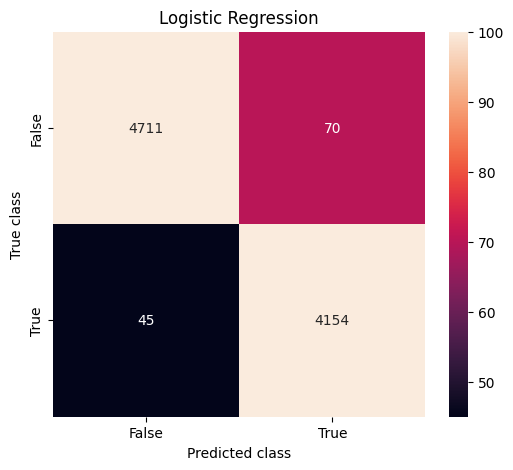

Accuracy:  0.9871937639198218
Precision:  0.9834280303030303
Recall:  0.9892831626577756
F1-Score:  0.9863469072776919
Matthews correlation coefficient:  0.9743040274344582
Time taken(in sec):  12.12
---------------------------------------------------------------------- 



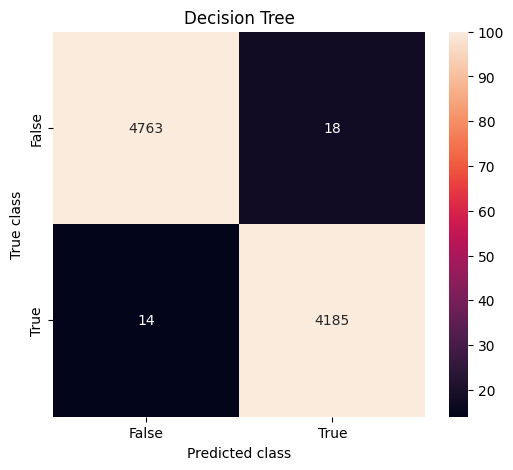

Accuracy:  0.9964365256124722
Precision:  0.9957173447537473
Recall:  0.9966658728268636
F1-Score:  0.9961913830040466
Matthews correlation coefficient:  0.9928438009492561
Time taken(in sec):  58.43
---------------------------------------------------------------------- 



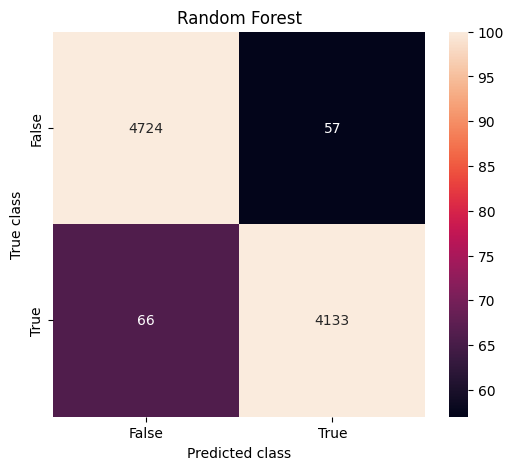

Accuracy:  0.9863028953229399
Precision:  0.9863961813842482
Recall:  0.984281971898071
F1-Score:  0.9853379425438074
Matthews correlation coefficient:  0.9724886192820441
Time taken(in sec):  158.36
---------------------------------------------------------------------- 



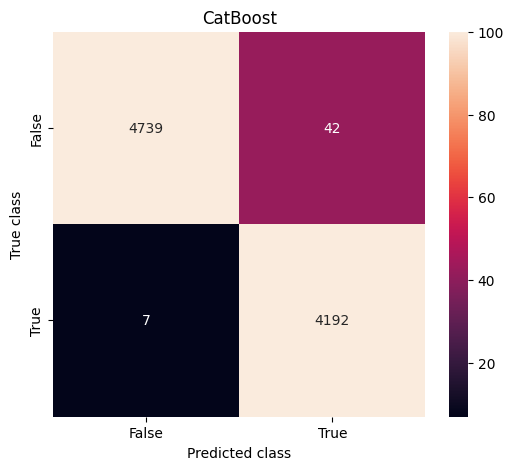

Accuracy:  0.994543429844098
Precision:  0.9900803023145961
Recall:  0.9983329364134318
F1-Score:  0.9941894936558757
Matthews correlation coefficient:  0.989076657374125
Time taken(in sec):  194.34
---------------------------------------------------------------------- 



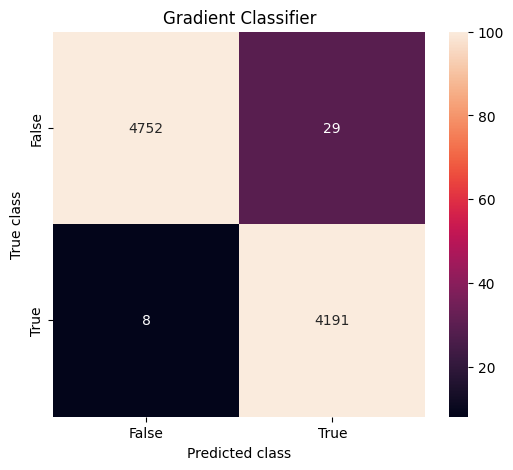

Accuracy:  0.995879732739421
Precision:  0.9931279620853081
Recall:  0.9980947844724934
F1-Score:  0.9956051787623234
Matthews correlation coefficient:  0.9917381561595743
Time taken(in sec):  359.45
---------------------------------------------------------------------- 



In [17]:
for name, model in models.items():
    start = time.time()
    model.fit(xtrain, ytrain)
    predict = model.predict(xtest)
    
    LABELS = ['False', 'True']
    conf_matrix = confusion_matrix(ytest, predict)
    plt.figure(figsize =(6,5))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, vmax = 100, annot = True, fmt ="d");
    plt.title(f'{name}')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("Accuracy: ", accuracy_score(ytest, predict))
    print("Precision: ", precision_score(ytest, predict))
    print("Recall: ", recall_score(ytest, predict))
    print("F1-Score: ", f1_score(ytest, predict))
    print("Matthews correlation coefficient: ", matthews_corrcoef(ytest, predict))
    end = time.time()
    print("Time taken(in sec): ",round(end-start, 2))
    print('-' * 70, '\n')

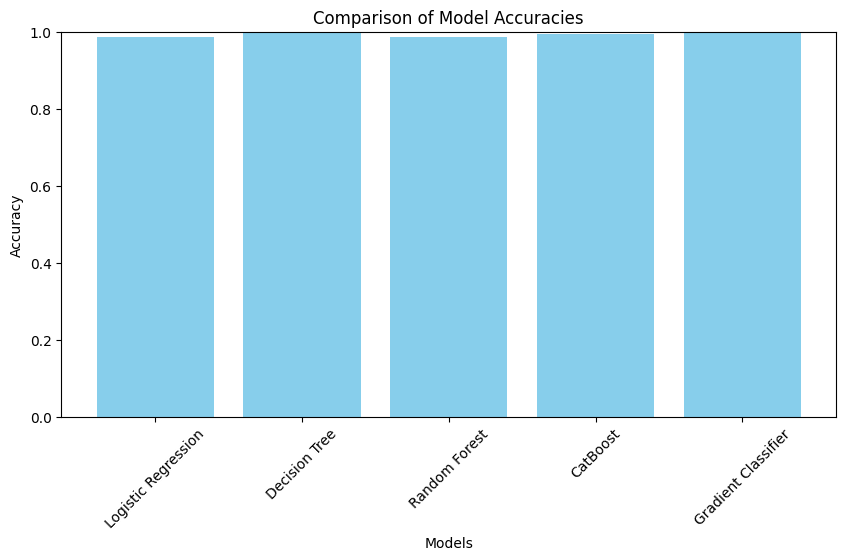

In [18]:
# Store accuracies in a dictionary
model_accuracies = {}

for name, model in models.items():
    start = time.time()
    model.fit(xtrain, ytrain)
    predict = model.predict(xtest)
    
    acc = accuracy_score(ytest, predict)
    model_accuracies[name] = acc

# Plot model accuracies
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
